# Analyzing Data from Zigzag

### Importing data through sqlite3

In [1]:
import pandas as pd

In [2]:
import sqlite3

In [3]:
connect = sqlite3.connect('C:/data/zigzag_DB.db')
connect

In [4]:
query = 'SELECT * FROM sqlite_master'
schema = pd.read_sql(query, connect)

schema

,type,name,tbl_name,rootpage,sql
0,table,order,order,3142,"CREATE TABLE ""order"" (\n""timestamp"" TEXT,\n ""..."
1,table,good,good,2,"CREATE TABLE ""good"" (\n""goods_id"" INTEGER,\n ..."
2,table,shop,shop,10,"CREATE TABLE ""shop"" (\n""shop_id"" INTEGER,\n ""..."
3,table,log,log,121,"CREATE TABLE ""log"" (\n""timestamp"" TEXT,\n ""us..."
4,table,user,user,18,"CREATE TABLE ""user"" (\n""user_id"" TEXT,\n ""os""..."


In [5]:
for i in schema['sql']:
    print(i)

CREATE TABLE "order" (
"timestamp" TEXT,
  "user_id" TEXT,
  "goods_id" INTEGER,
  "shop_id" INTEGER,
  "price" INTEGER
)
CREATE TABLE "good" (
"goods_id" INTEGER,
  "timestamp" TEXT,
  "shop_id" INTEGER,
  "category" TEXT,
  "price" INTEGER,
  "image_type" TEXT,
  "image_width" INTEGER,
  "image_height" INTEGER
)
CREATE TABLE "shop" (
"shop_id" INTEGER,
  "name" TEXT,
  "category" TEXT,
  "age" TEXT,
  "style" TEXT
)
CREATE TABLE "log" (
"timestamp" TEXT,
  "user_id" TEXT,
  "event_origin" TEXT,
  "event_name" TEXT,
  "event_goods_id" REAL,
  "event_shop_id" REAL
)
CREATE TABLE "user" (
"user_id" TEXT,
  "os" TEXT,
  "age" INTEGER
)


### Make a table named 'order' with purchase data

In [6]:
query = "SELECT * FROM 'order'"

order = pd.read_sql(query, connect)
order.head(5)

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


* timestamp: The exact time when the purchase is made
* user_id: The id address for each user
* goods_id: The id of goods that users purchase
* shop_id: The id of shops where users purchase the goods
* price: The price of the goods

### Find the top 10 shopping malls

In [7]:
tb = pd.pivot_table(order, values = 'price',
                           index = 'shop_id',
                           aggfunc = 'sum')
tb

,price
shop_id,
1,84600
2,347100
3,143100
4,49000
5,9900
...,...
191,65000
192,7800
193,39000


In [8]:
tb.sort_values(('price'), ascending = False).head(10)

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


### Find the top 10 malls and make a table including the number of sales

In [9]:
tb = pd.pivot_table(order, values = 'price',
                           index = 'shop_id',
                           aggfunc = ['sum','count'])
tb.columns = ['sum','count']

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'      # set as Korean

In [11]:
top10 = tb.sort_values(('sum'), ascending = False).head(10)

### Make a barplot with the sales of the top10 malls

In [12]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:/windows/fonts/malgun.ttf').get_name()
rc('font', family = font_name)

Text(0.5, 1.0, '매출 top10 쇼핑몰의 판매총금액')

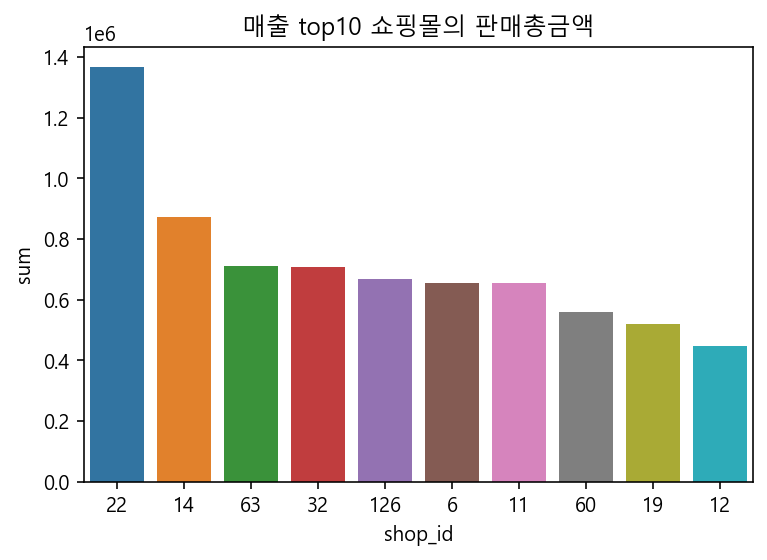

In [13]:
sns.barplot(data = top10, x = top10.index, y = 'sum', order = top10.index)
plt.title('매출 top10 쇼핑몰의 판매총금액')

### Visualize sales by time

In [14]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [15]:
order.dtypes

timestamp    object
user_id      object
goods_id      int64
shop_id       int64
price         int64
dtype: object

In [16]:
order['timestamp'] = pd.to_datetime(order['timestamp'])
order.dtypes

timestamp    datetime64[ns]
user_id              object
goods_id              int64
shop_id               int64
price                 int64
dtype: object

Text(0.5, 1.0, '시간대별 매출')

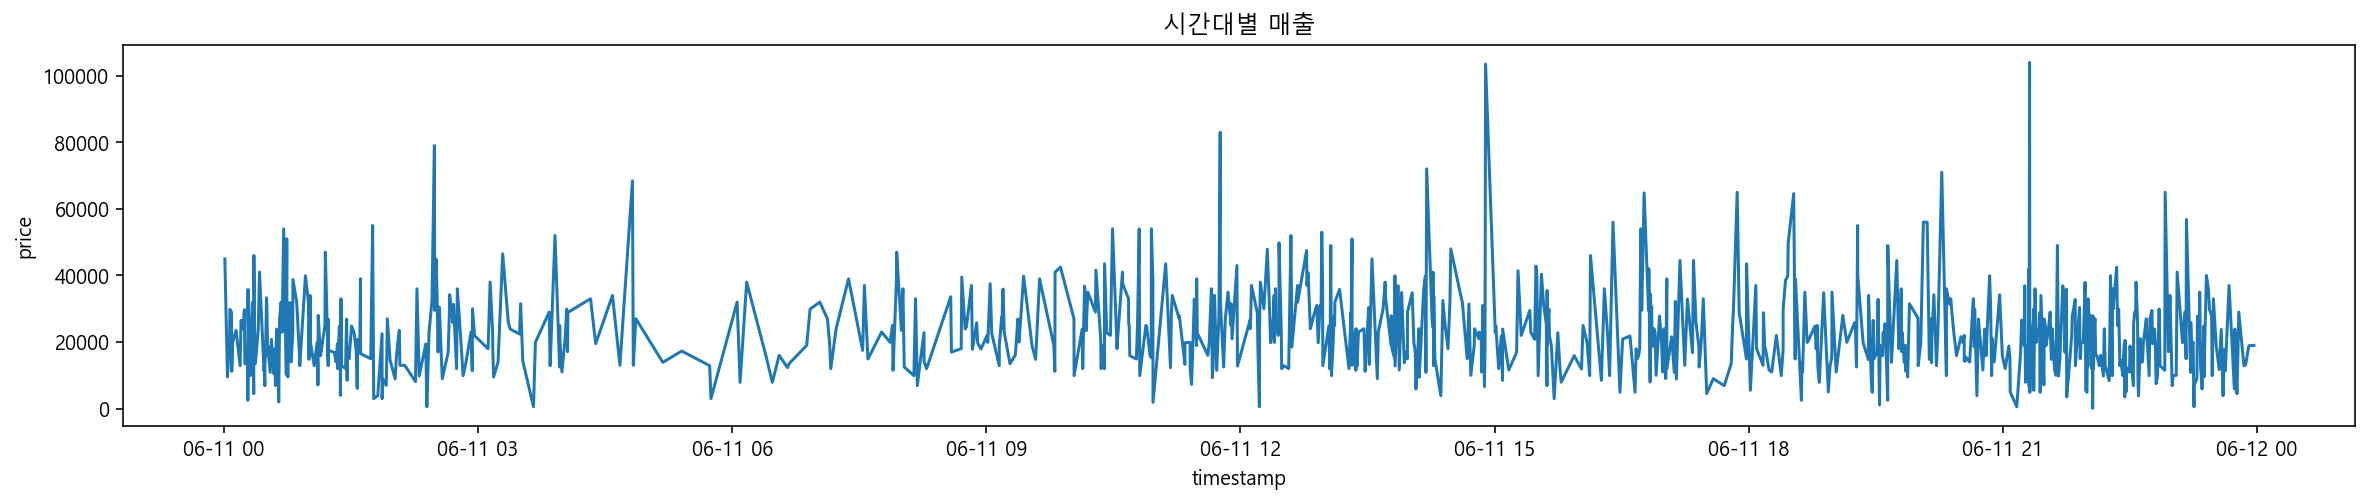

In [17]:
plt.figure(figsize = (20,3.5))
sns.lineplot(data = order, x = 'timestamp', y = 'price')
plt.title('시간대별 매출')

### Visualize sales by hour

In [18]:
order['hour'] = order['timestamp'].dt.hour
tb = order.pivot_table(values = 'price', index = 'hour', aggfunc = 'sum')
tb.head()

,price
hour,
0,1479210
1,990300
2,787830
3,467650
4,304800


Text(0.5, 1.0, '시간별 매출')

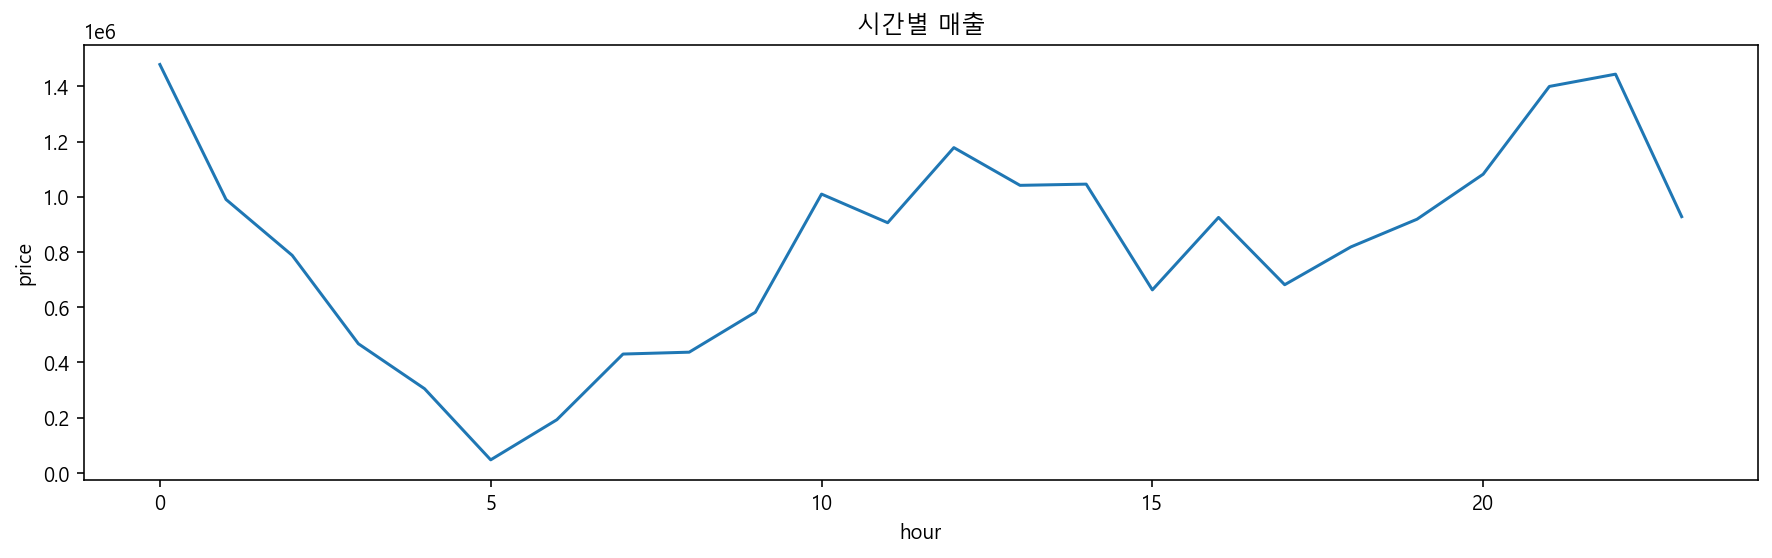

In [19]:
plt.figure(figsize = [15,4])
sns.lineplot(data = tb, x = tb.index, y = 'price')
plt.title('시간별 매출')

### Merge 'user' table with 'order' table

In [20]:
query = "SELECT * FROM 'user'"

user = pd.read_sql(query, connect)
user.dtypes

user_id    object
os         object
age         int64
dtype: object

In [21]:
merge = pd.merge(order , user, on = 'user_id')
merge.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17


### Visualize the age group of the top 10 malls

In [22]:
merge['age'].unique()

array([39, 17, -1, 34, 21, 22, 24, 27, 44, 28, 19, 15, 26, 31, 29, 18, 36,
       16, 20, 30, 45, 32, 23, 33, 25, 35, 37, 38, 41, 43, 40],
      dtype=int64)

In [23]:
merge_top10 = merge[(merge['shop_id'].isin(top10.index)) & (merge['age'] != -1)]

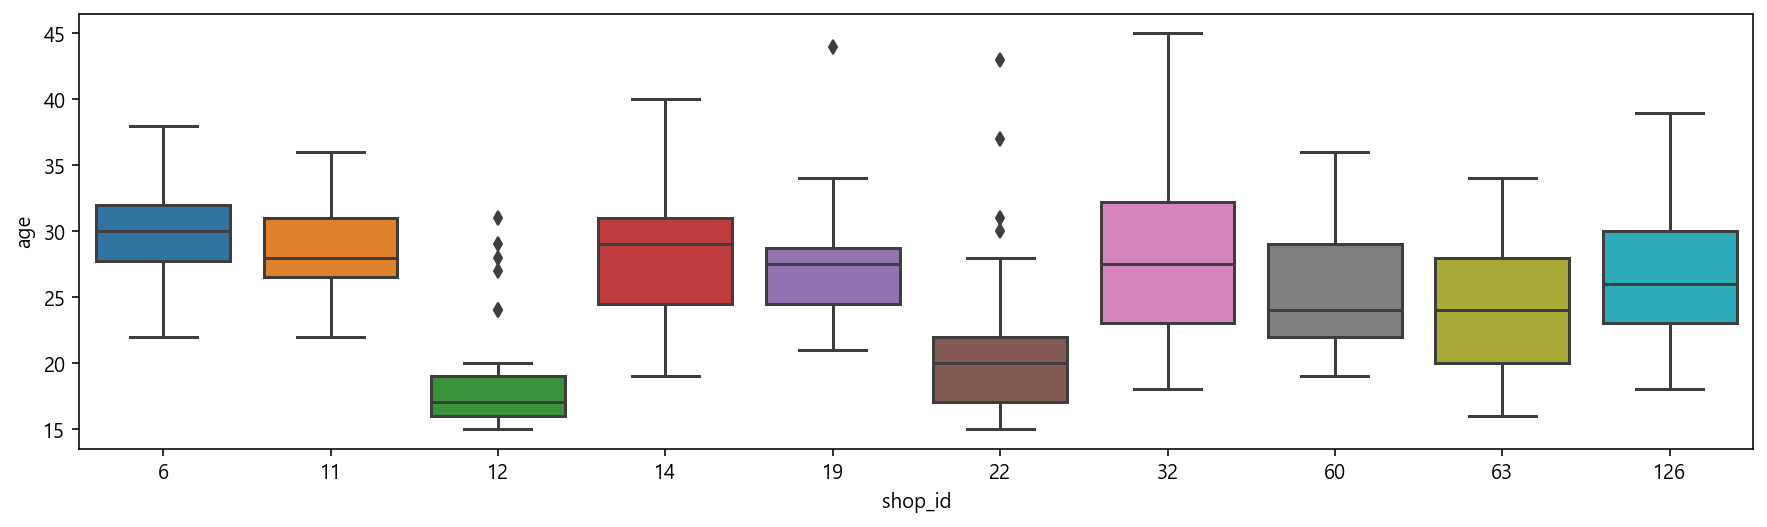

In [24]:
plt.figure(figsize = (15,4))
sns.boxplot(data = merge_top10, x = 'shop_id', y = 'age')

### Make a column to see if customers' age group fits the target age group of the malls

In [25]:
age_group = []
for i in user['age']:
    if i == -1:
        age_group.append('알수없음')
    elif i // 10 == 1:
        age_group.append('10대')
    elif i // 10 > 3:
        age_group.append('30대 후반')
    else:
        if i % 10 < 3:
            age_group.append(str(i // 10 * 10) + '대 초반')
        elif i % 10 <= 6:
            age_group.append(str(i // 10 * 10) + '대 중반')
        else:
            age_group.append(str(i // 10 * 10) + '대 후반')

In [27]:
len(user['age'])

10000

In [29]:
len(age_group) 

10000

In [30]:
user['age_group'] = age_group

In [31]:
query = "SELECT * FROM 'shop'"
shop = pd.read_sql(query, connect)
shop.columns

Index(['shop_id', 'name', 'category', 'age', 'style'], dtype='object')

In [32]:
merge = pd.merge(order, user, on = 'user_id')
merge = pd.merge(merge, shop, on = 'shop_id')

merge.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,age_group,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직


In [38]:
def check(var):
    if var['category'] == '의류' and var['age_group'] == '알수없음': 
        return True
    else:
        return var['age_group'] in str(var['age_y'])

In [39]:
merge['거래연령 일치여부'] = merge.apply(check, axis = 1)
merge.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,age_group,name,category,age_y,style,거래연령 일치여부
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직,True


In [40]:
piv_table = merge.pivot_table(values = '거래연령 일치여부',
                              index = 'shop_id',
                              aggfunc = ['mean','count'])
piv_table.head()

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
1,0.666667,3
2,0.937500,16
3,0.400000,5
4,1.000000,1
5,0.000000,1


In [41]:
piv_table[piv_table.index.isin(top10.index)]

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
6,0.750000,24
11,0.684211,19
12,0.857143,42
14,0.566667,30
19,0.789474,19
22,0.929293,99
32,0.540541,37
60,0.695652,23


The table above represents how much the target age group of the top 10 malls fits the actual users' age group.

In [42]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

for i in style_list:
    shop[i] = shop['style'].str.contains(i)
    
shop.head()

,shop_id,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,...,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


### Draw a graph showing the age group of the three style categories below.

* 심플 베이직
* 러블리
* 모던시크

In [43]:
merge = pd.merge(order, user, on = 'user_id')
merge = pd.merge(merge, shop, on = 'shop_id')

merge.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,age_group,name,...,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,...,False,False,False,False,False,False,False,False,False,False
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,...,False,False,False,False,False,False,False,False,False,False
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,...,False,False,False,False,False,False,False,False,False,False
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,...,False,False,False,False,False,False,False,False,False,False
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,...,False,False,False,False,False,False,False,False,False,False


C:\Users\youjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\youjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


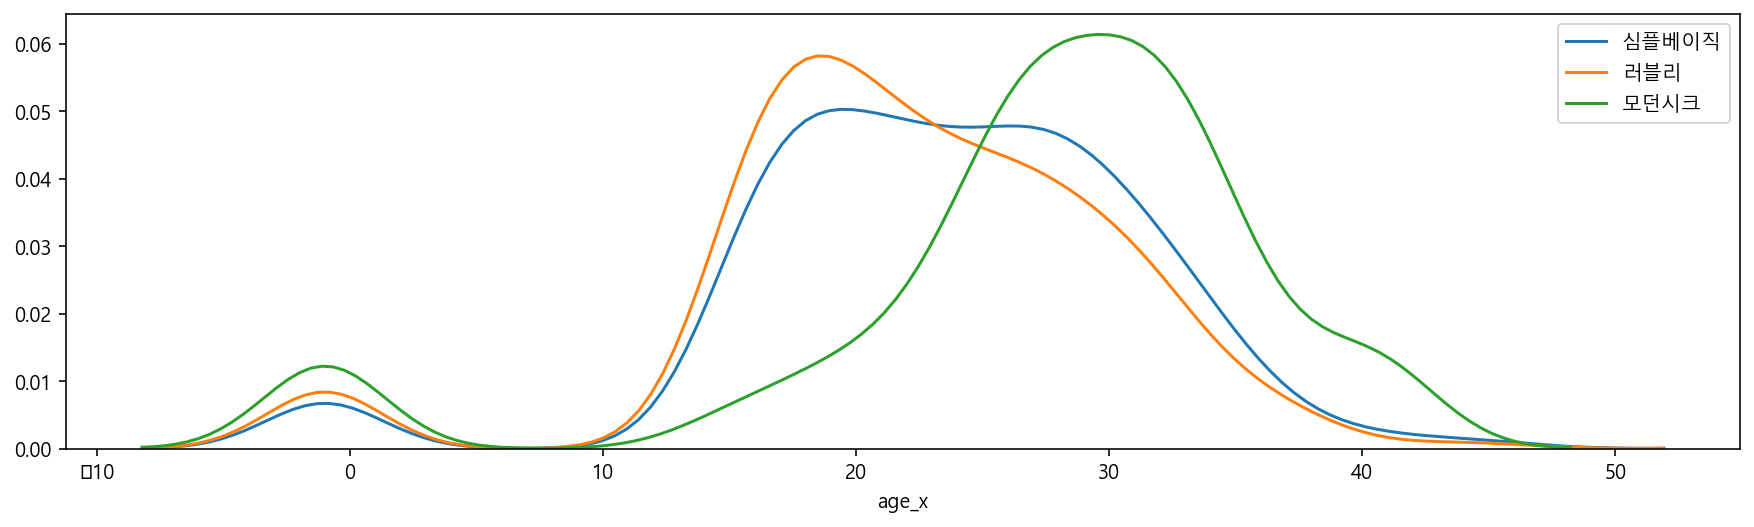

In [44]:
plt.figure(figsize = (15,4))
sns.distplot(merge.loc[merge['심플베이직'] == True, 'age_x'], label = '심플베이직', hist=False)
sns.distplot(merge.loc[merge['러블리'] == True, 'age_x'], label = '러블리', hist=False)
sns.distplot(merge.loc[merge['모던시크'] == True, 'age_x'], label = '모던시크', hist=False)

### Visualize page duration of each customer

In [45]:
query = "SELECT * FROM 'log'"
log = pd.read_sql(query, connect)

log.dtypes

timestamp          object
user_id            object
event_origin       object
event_name         object
event_goods_id    float64
event_shop_id     float64
dtype: object

In [46]:
log['timestamp'] = pd.to_datetime(log['timestamp'])
log.dtypes

timestamp         datetime64[ns]
user_id                   object
event_origin              object
event_name                object
event_goods_id           float64
event_shop_id            float64
dtype: object

In [49]:
id = {}
count = 1
for i in log['user_id'].unique():
    id[i] = count
    count += 1

In [50]:
log['new_id'] = log['user_id'].map(id)
log.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,new_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN,1
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN,2
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN,3
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN,1
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN,4


In [51]:
user_number_order = len(set(order['user_id']))
user_number_log = len(set(log['user_id']))
user_duplicated = set(order['user_id']) & set(log['user_id'])

print('구매한 총 고객 수: ',user_number_order,'명')
print('log데이터에 기록된 고객 수: ',user_number_log,'명')
print('중복되는 고객 수: ', len(user_duplicated),'명')

구매한 총 고객 수:  832 명
log데이터에 기록된 고객 수:  9909 명
중복되는 고객 수:  742 명


In [52]:
order_copy = order[order['user_id'].isin(user_duplicated)]
order_copy['event_origin'] = order_copy['shop_id']
order_copy['event_name'] = 'purchase'
order_copy['event_goods_id'] = order_copy['goods_id']

order_copy.columns

C:\Users\youjin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\youjin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\youjin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Index(['timestamp', 'user_id', 'goods_id', 'shop_id', 'price', 'hour',
       'event_origin', 'event_name', 'event_goods_id'],
      dtype='object')

In [53]:
order_copy = order_copy[['timestamp', 'user_id','event_origin',
       'event_name', 'event_goods_id', 'price']]

log_order = pd.concat([log, order_copy], sort = False)
log_order.shape

(106587, 8)

In [54]:
log_order['purchase'] = log_order['price'] > 0

log_order.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,new_id,price,purchase
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN,1.0,NaN,False
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN,2.0,NaN,False
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN,3.0,NaN,False
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN,1.0,NaN,False
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN,4.0,NaN,False


In [55]:
log_order = log_order.sort_values(by = ['user_id', 'timestamp']).reset_index(drop = True)

log_order['timestamp_after'] = log_order.groupby(['new_id'])['timestamp'].shift(-1)
log_order.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,new_id,price,purchase,timestamp_after
0,2018-06-11 15:57:10.615,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,5900.0,NaN,False,2018-06-11 15:59:05.505
1,2018-06-11 15:59:05.505,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,shops_bookmark,app_page_view,NaN,NaN,5900.0,NaN,False,NaT
2,2018-06-11 00:55:37.309,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1131.0,NaN,False,2018-06-11 00:55:44.430
3,2018-06-11 00:55:44.430,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,enter_browser,2506.0,40.0,1131.0,NaN,False,2018-06-11 01:00:33.295
4,2018-06-11 01:00:33.295,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,my_goods,app_page_view,NaN,NaN,1131.0,NaN,False,2018-06-11 01:11:03.608


In [58]:
log_order['timestamp_after'] = pd.to_datetime(log_order['timestamp_after'])
log_order['timestamp'] = pd.to_datetime(log_order['timestamp'])

log_order.dtypes

timestamp          datetime64[ns]
user_id                    object
event_origin               object
event_name                 object
event_goods_id            float64
event_shop_id             float64
new_id                    float64
price                     float64
purchase                     bool
timestamp_after    datetime64[ns]
dtype: object

In [59]:
log_order['page_duration'] = log_order['timestamp_after'] - log_order['timestamp']

In [60]:
log_order['page_duration'].head()

0   00:01:54.890000
1               NaT
2   00:00:07.121000
3   00:04:48.865000
4   00:10:30.313000
Name: page_duration, dtype: timedelta64[ns]

In [61]:
log_order['page_duration'] = log_order['page_duration'].dt.total_seconds()
log_order['page_duration'].head()

0    114.890
1        NaN
2      7.121
3    288.865
4    630.313
Name: page_duration, dtype: float64

In [62]:
log_order['page_duration'] = log_order['page_duration'].fillna(0)

In [63]:
is_out = []
for i in log_order['page_duration']:
    if i == 0:
        is_out.append(True)
    elif i >= 60*40:
        is_out.append(True)
    else:
        is_out.append(False)
        
log_order['is_out'] = is_out

In [64]:
log_order[log_order['is_out'] == True]['page_duartion'] = 0
log_order[['is_out','page_duration']].head()

C:\Users\youjin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,is_out,page_duration
0,False,114.890
1,True,0.000
2,False,7.121
3,False,288.865
4,False,630.313
